In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.optimize import minimize

In [2]:
m_e =1
h_cut = 1
g = 10

    H = T + V 
    T = -(1/2)*d_2/dx_2
    V = m*g*x

    We can make use of numerical derivative simulation like nr or secant method for 1st order derivative maxima or minima solution
    and similarly taylor series derived, first or second order derivative with the help of forward, backward and central difference method
    f_double_dash = f(x+h) - 2*f(x) + f(x-h) / h^2

In [3]:
#f = lambda x: np.sin(x)
#x = np.arange(0,100,0.01)

In [4]:
def d_dx(f, x):
    h = x[1] - x[0]
    f_dash = np.zeros(len(x))
    
    for i in range(len(x)-1):
        f_dash[i] = ( f(x[i+1]) - f(x[i]) )/h
    
    return f_dash

In [5]:
#f_dash = first_order_derivative(f, x)
# plt.plot(x, f_dash)
# plt.plot(x, np.cos(x))

In [6]:
def d_2_dx(f, x):
    h = x[1] - x[0]
    f_double_dash = np.zeros(len(x))
    
    for i in range(1, len(x)-1):
        f_double_dash[i] = ( f(x[i+1]) - 2*f(x[i]) + f(x[i-1])) / h**2
        
    return f_double_dash

In [7]:
def bra_H_ket(f, V, x_grid):
    T_ket = (-1/2)*d_2_dx(f,x_grid)
    
    bra_T_ket = simps(np.conj(f(x_grid)) * T_ket, x_grid)
    bra_V_ket = simps(np.conj(f(x_grid))*V*f(x_grid), x_grid)
    
    bra_H_ket = bra_T_ket + bra_V_ket
    
    return bra_H_ket

In [8]:
def bra_ket_overlap(f, x_grid):
    bra_ket_integrate = simps(np.conj(f(x_grid))*f(x_grid) , x_grid)
    
    return bra_ket_integrate

In [9]:
def expected_energy(f, V, x_grid):
    bra_h_ket = bra_H_ket(f, V, x_grid)
    bra_ket_integrate = bra_ket_overlap(f, x_grid)
    
    bra_E_ket = bra_h_ket / bra_ket_integrate
    
    return bra_E_ket

In [10]:
# finding minimum expectation energy from the varied alpha
def find_minima(energy_list, alpha_list):
    least = energy_list[0]
    alpha = alpha_list[0]
    for i in range(1, len(alpha_list)):
        if energy_list[i] < least:
            least = energy_list[i]
            alpha = alpha_list[i]
    
    return least, alpha

2.5

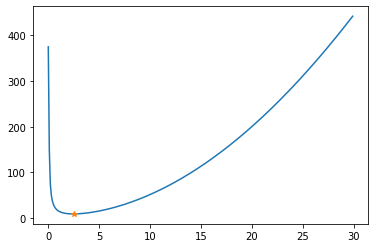

In [16]:
# For positive alpha only
alpha_list = np.arange(0,30, 0.1)
x_grid = np.arange(0,50,0.01)
V = m_e*g*x_grid
energy_list = []

for alpha in alpha_list:
    psi_trial = lambda x: x*np.exp(-alpha*x)
    energy = expected_energy(psi_trial, V, x_grid)
    energy_list.append(energy)

minimum_energy, alpha_ind = find_minima(energy_list, alpha_list)
plt.plot(alpha_list, energy_list)
plt.plot(alpha_ind, minimum_energy, '*')
alpha_ind

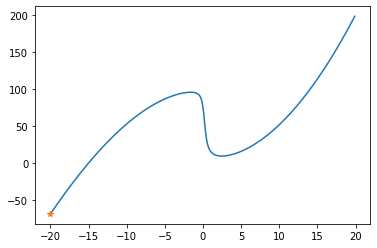

In [18]:
# For integer alpha: taking positive and negative values
alpha_list = np.arange(-20,20, 0.1)
x_grid = np.arange(0,10,0.01)
V = m_e*g*x_grid
energy_list = []

for alpha in alpha_list:
    psi_trial = lambda x: x*np.exp(-alpha*x)
    energy = expected_energy(psi_trial, V, x_grid)
    energy_list.append(energy)

minimum_energy, alpha_ind = find_minima(energy_list, alpha_list)
plt.plot(alpha_list, energy_list)
plt.plot(alpha_ind, minimum_energy, '*')

                    # Let's change the trial function

                    # Psi trial 2

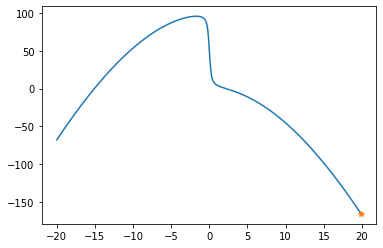

In [13]:
# For integer alpha: taking positive and negative values
alpha_list = np.arange(-20,20, 0.1)
x_grid = np.arange(0,10,0.01)
V = m_e*g*x_grid
energy_list = []

for alpha in alpha_list:
    psi_trial = lambda x: np.exp(-alpha*x)
    energy = expected_energy(psi_trial, V, x_grid)
    energy_list.append(energy)

minimum_energy, alpha_ind = find_minima(energy_list, alpha_list)
plt.plot(alpha_list, energy_list)
plt.plot(alpha_ind, minimum_energy, '*')

                           # Psi_trial 3

<ipython-input-6-c49aacdab4f9>:6: RuntimeWarning: overflow encountered in double_scalars
  f_double_dash[i] = ( f(x[i+1]) - 2*f(x[i]) + f(x[i-1])) / h**2
<ipython-input-14-db3736946b49>:8: RuntimeWarning: overflow encountered in exp
  psi_trial = lambda x: np.exp(-alpha*x**2)
<ipython-input-6-c49aacdab4f9>:6: RuntimeWarning: invalid value encountered in double_scalars
  f_double_dash[i] = ( f(x[i+1]) - 2*f(x[i]) + f(x[i-1])) / h**2
<ipython-input-7-108b4b09cd6b>:4: RuntimeWarning: overflow encountered in multiply
  bra_T_ket = simps(np.conj(f(x_grid)) * T_ket, x_grid)
<ipython-input-7-108b4b09cd6b>:4: RuntimeWarning: invalid value encountered in multiply
  bra_T_ket = simps(np.conj(f(x_grid)) * T_ket, x_grid)
<ipython-input-7-108b4b09cd6b>:5: RuntimeWarning: overflow encountered in multiply
  bra_V_ket = simps(np.conj(f(x_grid))*V*f(x_grid), x_grid)
/home/user/anaconda3/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:398: RuntimeWarning: overflow encountered in add
  tmp = h

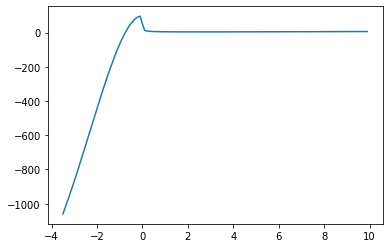

In [14]:
# For integer alpha: taking positive and negative values
alpha_list = np.arange(-10,10, 0.1)
x_grid = np.arange(0,10,0.01)
V = m_e*g*x_grid
energy_list = []

for alpha in alpha_list:
    psi_trial = lambda x: np.exp(-alpha*x**2)
    energy = expected_energy(psi_trial, V, x_grid)
    energy_list.append(energy)

minimum_energy, alpha_ind = find_minima(energy_list, alpha_list)
plt.plot(alpha_list, energy_list)
plt.plot(alpha_ind, minimum_energy, '*')

                            # Psi_trial 4

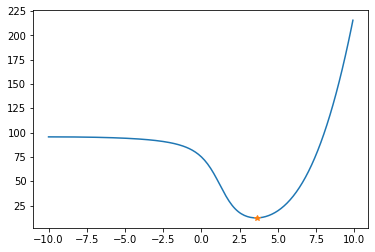

In [15]:
# For integer alpha: taking positive and negative values
alpha_list = np.arange(-10,10, 0.1)
x_grid = np.arange(0,10,0.01)
V = m_e*g*x_grid
energy_list = []

for alpha in alpha_list:
    psi_trial = lambda x: x*np.exp(-alpha*x**0.5)
    energy = expected_energy(psi_trial, V, x_grid)
    energy_list.append(energy)

minimum_energy, alpha_ind = find_minima(energy_list, alpha_list)
plt.plot(alpha_list, energy_list)
plt.plot(alpha_ind, minimum_energy, '*')